In [11]:
from Ising2018 import IsingSimple
import numpy as np
import matplotlib.pyplot as plt
import random
import time


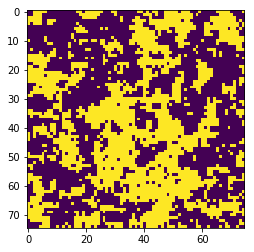

752
77.80895018577576


In [12]:
start=time.time()


testlattice = IsingSimple([1.0,-1.0], [75, 2.5, 0.0, 1.0], 0, 0, [0, 0, 0])
testlattice.to_equilibrium()
testlattice.lattice_grid()
print(testlattice.observables[0])


end = time.time()    
print(end - start)